# FIFA19 Dataset Wage Analysis

## Part 1 : Data Wrangling


In [254]:
# import necessary modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
fifa19 = pd.read_csv('data.csv', index_col = 0)
df = fifa19.copy()

In [256]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [258]:
df.describe()

ID           Age       Overall     Potential       Special  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   1597.809908   
std     29965.244204      4.669943      6.908930      6.136496    272.586016   
min        16.000000     16.000000     46.000000     48.000000    731.000000   
25%    200315.500000     21.000000     62.000000     67.000000   1457.000000   
50%    221759.000000     25.000000     66.000000     71.000000   1635.000000   
75%    236529.500000     28.000000     71.000000     75.000000   1787.000000   
max    246620.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              18159.000000  18159.000000  18159.000000   18147.000000   
mean                   1.113222      2.947299      2.361308      19.546096   
std                    0.394031      0.660456      0.756164      15.947765   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       8.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      49.734181  ...     48.548598     58.648274     47.281623   
std       18.364524  ...     15.704053     11.436133     19.904397   
min        5.000000  ...      5.000000      3.000000      3.000000   
25%       38.000000  ...     39.000000     51.000000     30.000000   
50%       54.000000  ...     49.000000     60.000000     53.000000   
75%       64.000000  ...     60.000000     67.000000     64.000000   
max       93.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 43 columns]

In [259]:
# Dropping Spaces

newcol = []

for col in df.columns:
    newcol.append(col.replace(' ', ''))
    
df.columns = newcol

In [260]:
# Dropping Repetitive/Irrelevant Columns
df.drop(['ID', 'Photo', 'Flag', 'ClubLogo', 'ReleaseClause', 'LoanedFrom', 'RealFace'], inplace=True, axis=1)

In [261]:
# Split Work Rate
df[['WorkRate1', 'WorkRate2']] = df['WorkRate'].str.split('/', expand=True)
df = df.drop('WorkRate', axis=1)
# Check
df[['WorkRate1', 'WorkRate2']].head()

WorkRate1 WorkRate2
0    Medium    Medium
1      High       Low
2      High    Medium
3    Medium    Medium
4      High      High

In [262]:
# Converting Height to Numerical Value in (cm)
Height_cm = []
for i in list(df['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
        
df['Height_cm'] = Height_cm

In [263]:
df['Height_cm'].head()

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height_cm, dtype: float64

In [264]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'PreferredFoot', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'BodyType', 'Position', 'JerseyNumber',
       'Joined', 'ContractValidUntil', 'Height', 'Weight', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'WorkRate1',
       'WorkRat

In [265]:
# Fill Null values with 0 since goalkeepers field attributes are irrelevant
df.loc[df['Position'] == 'GK', :].fillna(0, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [266]:
# Filling numerical values using mean 
# Note : This will not influence the data much as Null values make up 
# a very small fraction of the entire data (applies for all the fills)

fill_na_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes' ]]
for i in fill_na_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

In [267]:
# Filling "objects" / categorical values with mode

fill_na_mode = df.loc[:, [ 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 
        'RCB', 'RB','Position', 'Joined', 'ContractValidUntil','BodyType',
        'InternationalReputation', 'Height', 'Weight', 'PreferredFoot','JerseyNumber', 
        'WorkRate1', 'WorkRate2', 'Height_cm']]
for i in fill_na_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [268]:
# Replacing remaining NAs with reasonable value here of a median
fill_na_median = df.loc[:, ['WeakFoot', 'SkillMoves']]
for i in fill_na_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

In [269]:
# Replace NA with Freelance
df["Club"].fillna("Freelance", inplace = True)

In [270]:
# Checking for remaining Null values
df.columns[df.isna().any()]

Index([], dtype='object')

In [271]:
# Convert non-numerical values such as "K" to appropriate values
# using a simple function (in the wage/value column)

def parse_money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 10**6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 10**9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 10**3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

In [272]:
# Applying the function to respective columns
df['Value'] = df['Value'].apply(parse_money)
df['Wage'] = df['Wage'].apply(parse_money)
df[['Value', 'Wage']].head()

Value      Wage
0  110500000.0  565000.0
1   77000000.0  405000.0
2  118500000.0  290000.0
3   72000000.0  260000.0
4  102000000.0  355000.0

In [273]:
# Removing the "lbs" from the weight column
df['Weight']=df['Weight'].str.replace('lbs','')

In [274]:
# Convert Year + Month --> to just Year for consistency

def convert_to_year(s):
    if isinstance(s, str) and ',' in s:
        return float(s.split()[2])
    else:
        return float(s)

In [275]:
df['ContractValidUntil'] = df['ContractValidUntil'].apply(convert_to_year)
df['ContractValidUntil'].head()

0    2021.0
1    2022.0
2    2022.0
3    2020.0
4    2023.0
Name: ContractValidUntil, dtype: float64

In [276]:
df['BodyType'].value_counts()

Normal                 10643
Lean                    6417
Stocky                  1140
Messi                      1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Courtois                   1
Akinfenwa                  1
Shaqiri                    1
C. Ronaldo                 1
Name: BodyType, dtype: int64

In [277]:
df.loc[df['BodyType'].isin(['Normal', 'Stocky', 'Lean']), 'BodyType'] = df['BodyType'].value_counts().index[0]
df['BodyType'].value_counts()

Normal                 18200
Messi                      1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Courtois                   1
Akinfenwa                  1
Shaqiri                    1
C. Ronaldo                 1
Name: BodyType, dtype: int64

In [278]:
# Creating a threshold to count outliers for Wage n' Value

q1_wage=df.Wage.quantile(0.25)
q3_wage=df.Wage.quantile(0.75)
iqr_wage= q3_wage - q1_wage

q1_val=df.Value.quantile(0.25)
q3_val=df.Value.quantile(0.75)
iqr_val= q3_val - q1_val

upperwage= q3_wage + iqr_wage*1.5
upperval= q3_val + iqr_val*1.5



In [279]:
df.loc[df['Wage'] > upperwage]
len(df.loc[df['Wage'] > upperwage])

2031

In [281]:
df.loc[df['Value']> upperval]
len(df.loc[df['Value']> upperval])

2487

In the sport of football it's typical to see wages/value to be on the extreme end of the spectrum. 

In [282]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [283]:
len(df[df['Position'] == 'GK'])

2025

## Part 2 : Visualization and Data Storytelling

In [358]:
#sns.set_context("poster")
sns.set_context("paper")

In [359]:
sns.set_style('whitegrid')

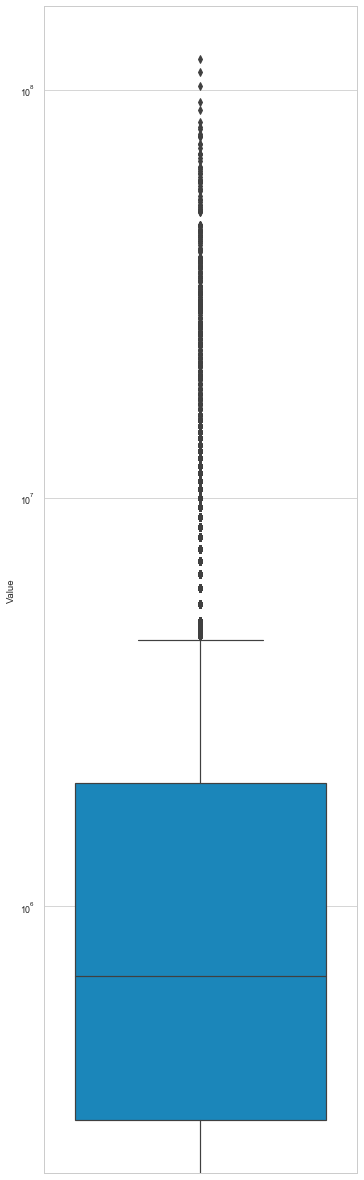

In [360]:
plt.figure(figsize = [5, 20])
sns.boxplot( y=df["Value"] ).set_yscale('log')


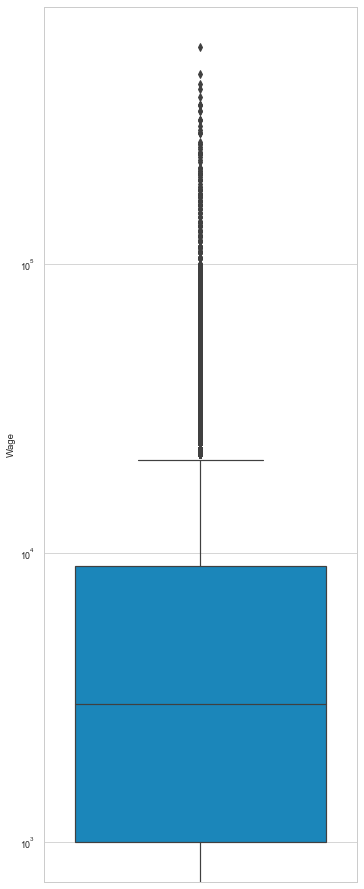

In [361]:
plt.figure(figsize = [5, 15])
sns.boxplot( y=df["Wage"] ).set_yscale('log')


In [362]:
# We can see that both Value/Wage are highly skewed

In [363]:
df[['Wage','Value']].describe()

Wage         Value
count   18207.000000  1.820700e+04
mean     9731.312133  2.410696e+06
std     21999.290406  5.594933e+06
min         0.000000  0.000000e+00
25%      1000.000000  3.000000e+05
50%      3000.000000  6.750000e+05
75%      9000.000000  2.000000e+06
max    565000.000000  1.185000e+08

In [364]:
#Number of countries available and top 5 countries with highest number of players
print('Total # of Nationalities : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))

#Most players consist of European Nationalities

Total # of Nationalities : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [365]:
#Most Valuable Players

print('Highest Value : '+str(df.loc[df['Value'].idxmax()][0]))
print('Highest Wage : '+str(df.loc[df['Wage'].idxmax()][0]))

Highest Value : Neymar Jr
Highest Wage : L. Messi


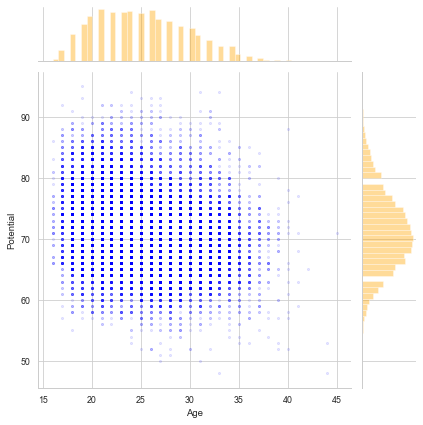

In [366]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'orange'})

In [367]:
# Both Age and Potential are approximately normally distributed

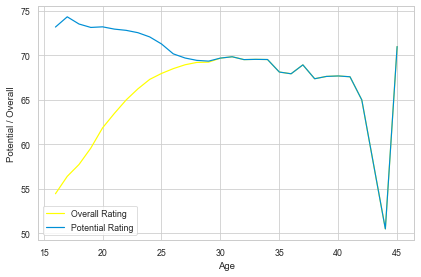

In [368]:
_ = sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = df, label = 'Overall Rating', color = 'yellow')
_ = sns.lineplot(x = 'Age', y = 'Potential', ci = None, data = df, label = 'Potential Rating')
_ = plt.ylabel('Potential / Overall')
_ = plt.legend(loc = 3)

# Footballers reach their full potential at around age 30? 




In [369]:
# It's clear that potential is reached at the age of ~ 30 on average

Text(0, 0.5, 'Count')

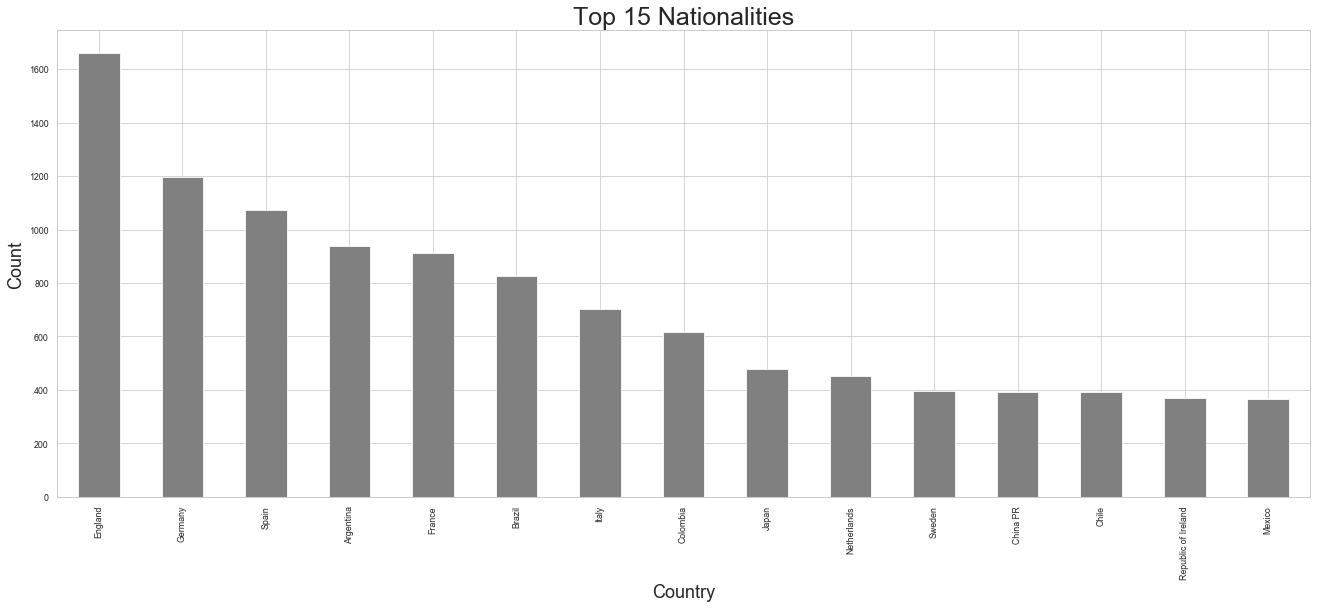

In [370]:
 # Top 50 Nationalities in FIFA19
df['Nationality'].value_counts().head(15).plot.bar(color = 'Grey', figsize = (20, 8))
plt.title('Top 15 Nationalities', fontsize = 25, fontweight = 15)
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

In [402]:
# Top Nationalities are : England, Germany, Spain, Argentina, and Brazil. 

In [412]:
# getting top ten most popular countries
top_10_countries = df['Nationality'].value_counts().head(10).index.values
top_10_countries_data = df.loc[df['Nationality'].isin(top_10_countries), :]

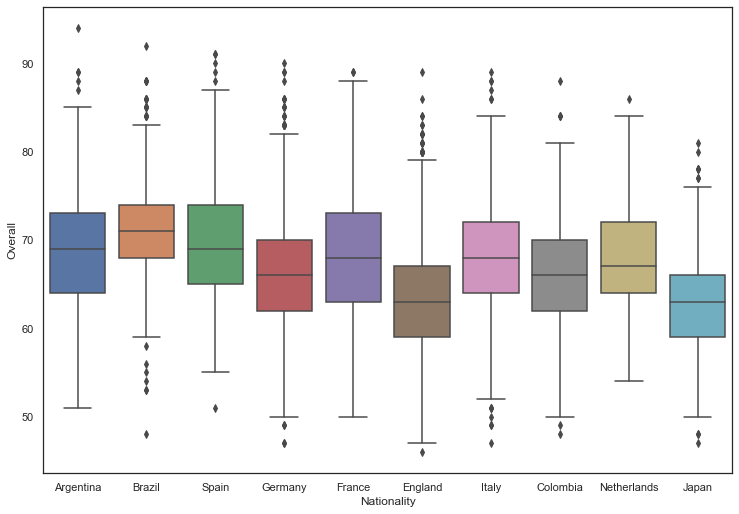

In [413]:

plt.figure(figsize=(11, 8))
_ = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_10_countries_data)

In [ ]:
# Brazil, Spain, and Argentina have highest overall score players

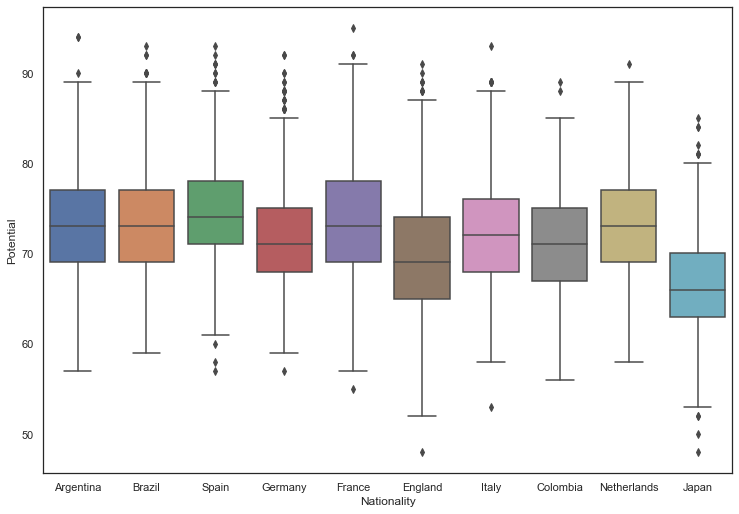

In [414]:

plt.figure(figsize=(11, 8))
_ = sns.boxplot(x = 'Nationality', y = 'Potential', data = top_10_countries_data)

In [411]:
# Same story holds for potential 

In [415]:
#  ten clubs
top_10_clubs = ['FC Barcelona', 'Real Madrid', 'Manchester City', 'Arsenal', 'Liverpool', 'Manchester United', 'Borussia Dortmund', 'FC Bayern München', 'Juventus', 'Paris Saint-Germain']
top_10_clubs_data = df.loc[df['Club'].isin(top_10_clubs), :]

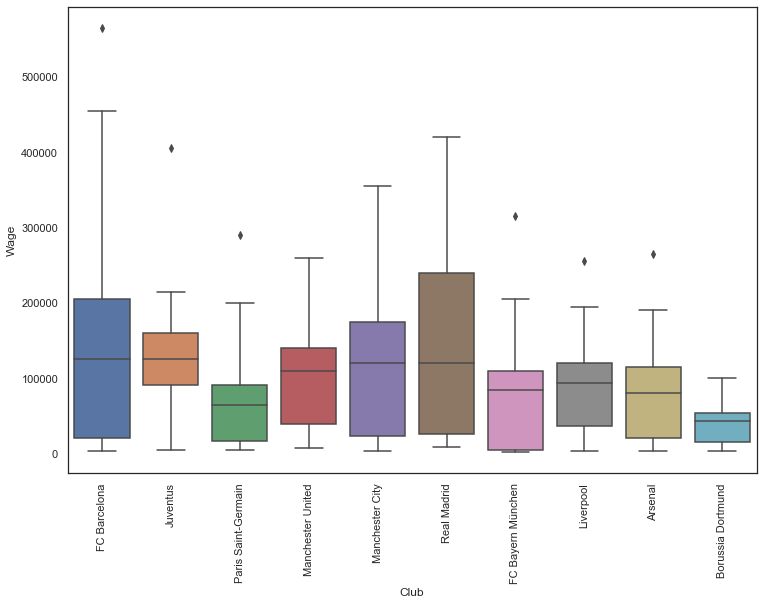

In [417]:
plt.figure(figsize=(11,8))
_ = sns.boxplot(x = 'Club', y = 'Wage', data = top_10_clubs_data)
_ = plt.xticks(rotation=90)

In [418]:
# Note Barcelona and Madrid player wages

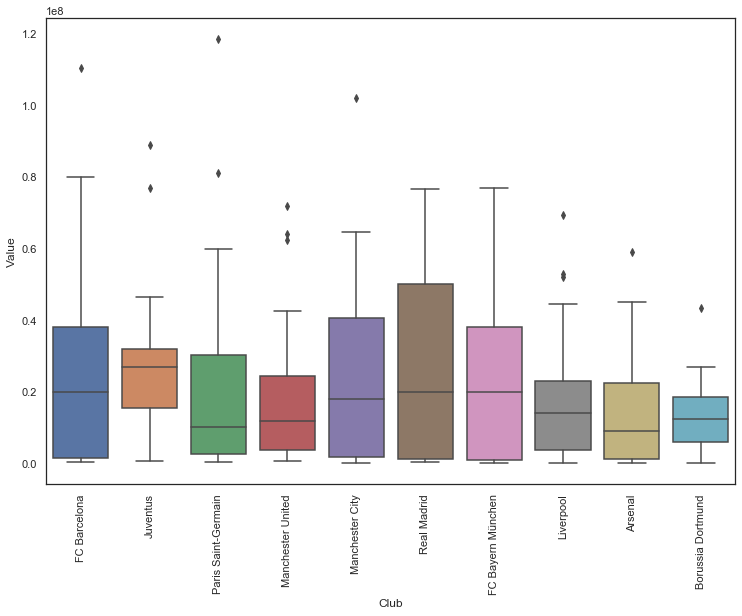

In [422]:
# Comparing Player's Value Across Clubs 
plt.figure(figsize=(11,8))
_ = sns.boxplot(x = 'Club', y = 'Value', data = top_10_clubs_data)
_ = plt.xticks(rotation=90)

In [ ]:
# Madrid, ManchesterCity and Barcelona and Bayern Munich hold highest values of players while Juventus holds the
# highest median value players

Text(0.5, 0, 'Age')

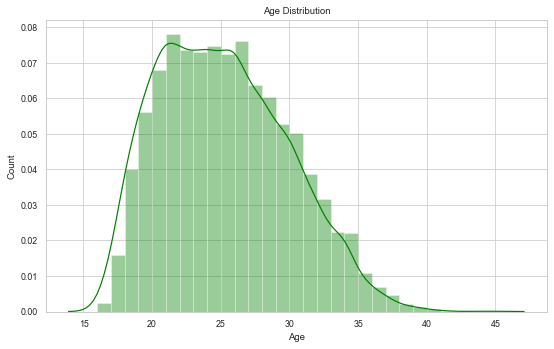

In [372]:
# Age Distribution 
bins1 = np.arange(df['Age'].min(), df['Age'].max()+1, 1)
plt.figure(figsize = (8,5))
sns.distplot(df['Age'], color = 'green', bins = bins1)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Value')

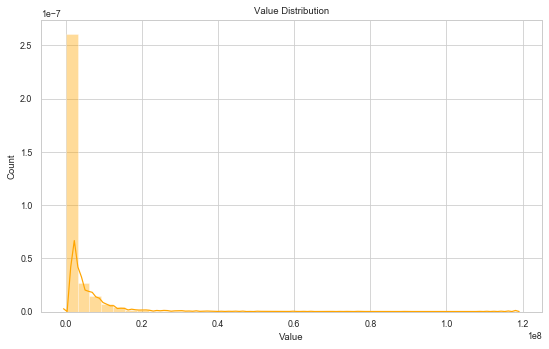

In [373]:
# Value Distribution
#bins2 = np.arange(df['Value'].min(), df['Value'].max()+1, 1)
plt.figure(figsize = (8,5))
sns.distplot(df['Value'], bins = 38, color = 'orange')
plt.title('Value Distribution')
plt.ylabel('Count')
plt.xlabel('Value')

In [374]:
# Confirming the right skewedness of Player Value

Text(0.5, 0, 'Wage')

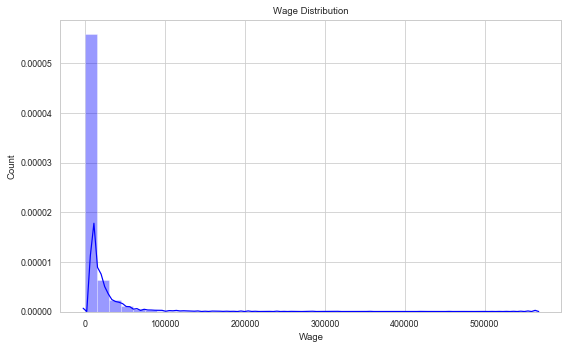

In [375]:
#bins3 = np.arange(df['Wage'].min(), df['Wage'].max()+1, 1)
plt.figure(figsize = (8,5))
sns.distplot(df['Wage'], color = 'blue', bins = 38)
plt.title('Wage Distribution')
plt.ylabel('Count')
plt.xlabel('Wage')

In [399]:
# As expected, Wage is skewed similarly to Value. 

Text(0.5, 0, 'Height (cm)')

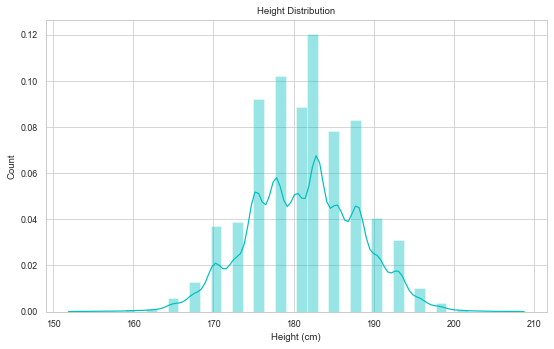

In [377]:
# Height Distribution
plt.figure(figsize = (8,5))
sns.distplot(df['Height_cm'], color = 'c', bins=38)
plt.title('Height Distribution')
plt.ylabel('Count')
plt.xlabel('Height (cm)')

In [378]:
df['Weight'] = df['Weight'].astype(int)

Text(0.5, 0, 'Weight')

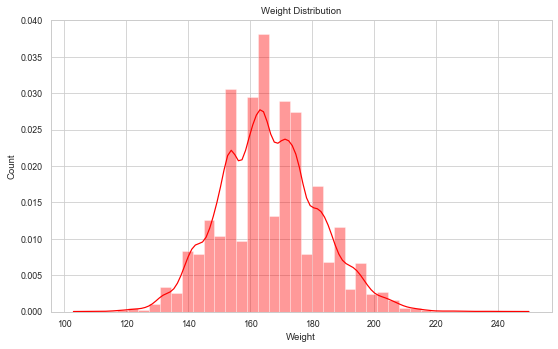

In [379]:
# Weight Distribution
plt.figure(figsize = (8,5))
sns.distplot(df['Weight'], color = 'r', bins = 38)
plt.title('Weight Distribution')
plt.ylabel('Count')
plt.xlabel('Weight')



Text(0.5, 0, 'Preferred Foot')

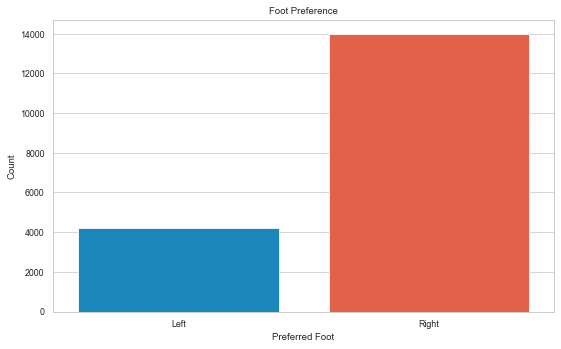

In [380]:
# Foot Preference
plt.figure(figsize = (8,5))
sns.countplot(df['PreferredFoot'])
plt.title('Foot Preference')
plt.ylabel('Count')
plt.xlabel('Preferred Foot')

In [381]:
# Top 10 left-footed footballers

df[df['PreferredFoot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality','Position']].head(10).style.background_gradient('magma')

In [382]:
# Top 10 Right-footed footballers

df[df['PreferredFoot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('magma')

Text(0.5, 0, 'Weak Foot')

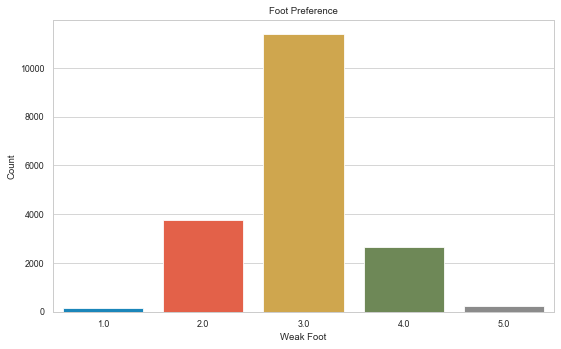

In [383]:
plt.figure(figsize = (8,5))
sns.countplot(df['WeakFoot'])
plt.title('Foot Preference')
plt.ylabel('Count')
plt.xlabel('Weak Foot')

In [384]:
# Sort Top 15 Players based on their Value and Wage
df.sort_values(by = 'Value', ascending = False)[['Name','Value','Wage']][:15]

Name        Value      Wage
2           Neymar Jr  118500000.0  290000.0
0            L. Messi  110500000.0  565000.0
4        K. De Bruyne  102000000.0  355000.0
5           E. Hazard   93000000.0  340000.0
15          P. Dybala   89000000.0  205000.0
16            H. Kane   83500000.0  205000.0
25          K. Mbappé   81000000.0  100000.0
7           L. Suárez   80000000.0  455000.0
17       A. Griezmann   78000000.0  145000.0
10     R. Lewandowski   77000000.0  205000.0
1   Cristiano Ronaldo   77000000.0  405000.0
11           T. Kroos   76500000.0  355000.0
30               Isco   73500000.0  315000.0
31         C. Eriksen   73500000.0  205000.0
3              De Gea   72000000.0  260000.0

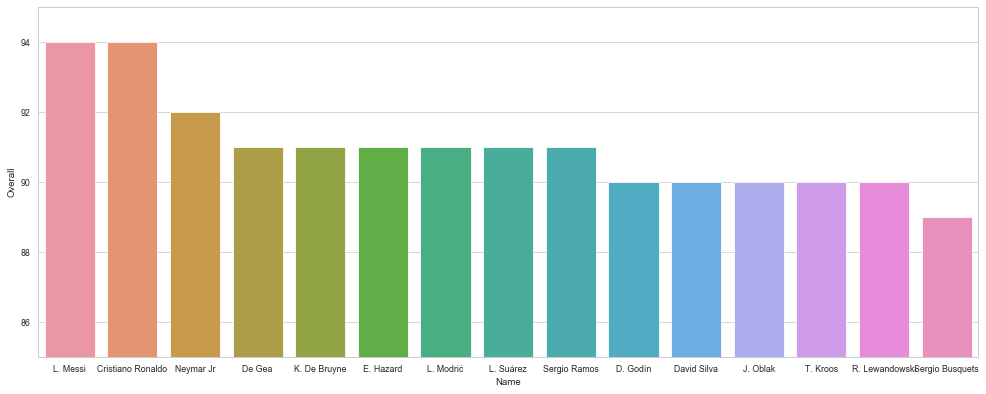

In [385]:
top_15 = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(15))
plt.figure(1,figsize = (15,6))
sns.barplot(x ='Name' , y = 'Overall' , data = top_15)
plt.ylim(85,95)
plt.show()

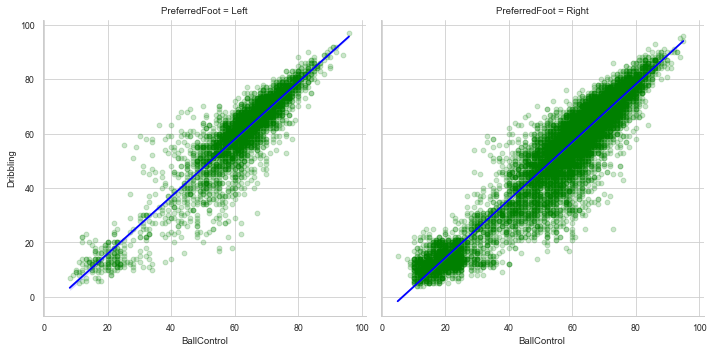

In [386]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'PreferredFoot',scatter_kws = {'alpha':0.2,'color':'green'},
           line_kws={'color':'blue'})

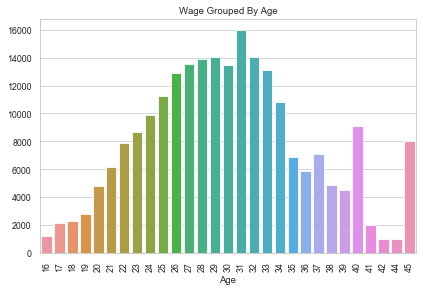

In [387]:
mean_wage = df.groupby('Age')['Wage'].mean()
_ = sns.barplot(x = mean_wage.index, y = mean_wage.values)
_ = plt.title('Wage Grouped By Age')
_ = plt.xticks(rotation=90)

# Mean Wage also peaks at around 31 (as they reach their max potential)

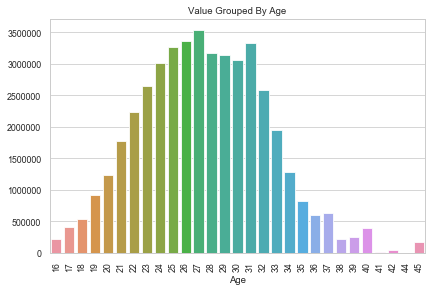

In [388]:
mean_value = df.groupby('Age')['Value'].mean()
_ = sns.barplot(x = mean_value.index, y = mean_value.values)
_ = plt.title('Value Grouped By Age')
_ = plt.xticks(rotation=90)

# Seems that players are valued higher at younger ages despite their wage 
# higher at later stages of their career.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


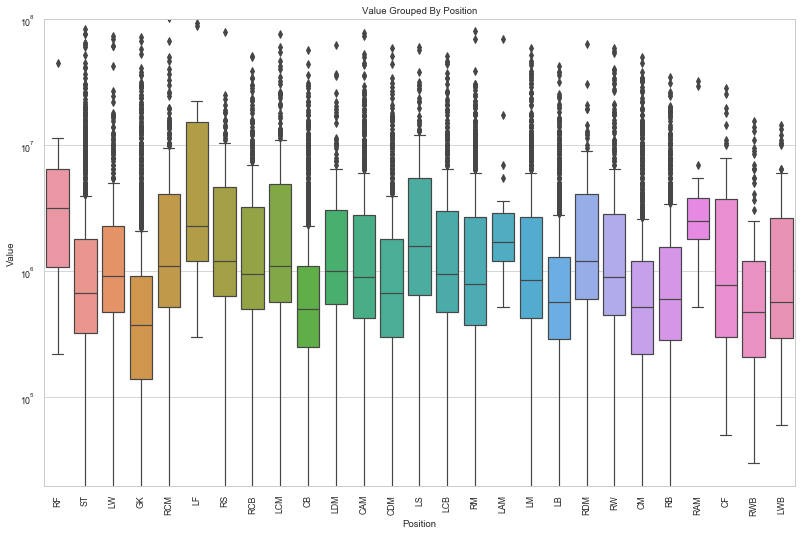

In [389]:
position_value = df.groupby('Position')['Value'].mean()
plt.figure(figsize=(12,8))
_ = sns.boxplot(x = 'Position', y = 'Value', data = df).set_yscale('log')
_ = plt.title('Value Grouped By Position')
_ = plt.xticks(rotation=90)
_ = plt.ylim(0, 100000000)

# sns.set_context("paper")
# Values seem to follow the field position where forwards are valued the most
# and goalkeepers are valued the least on average 

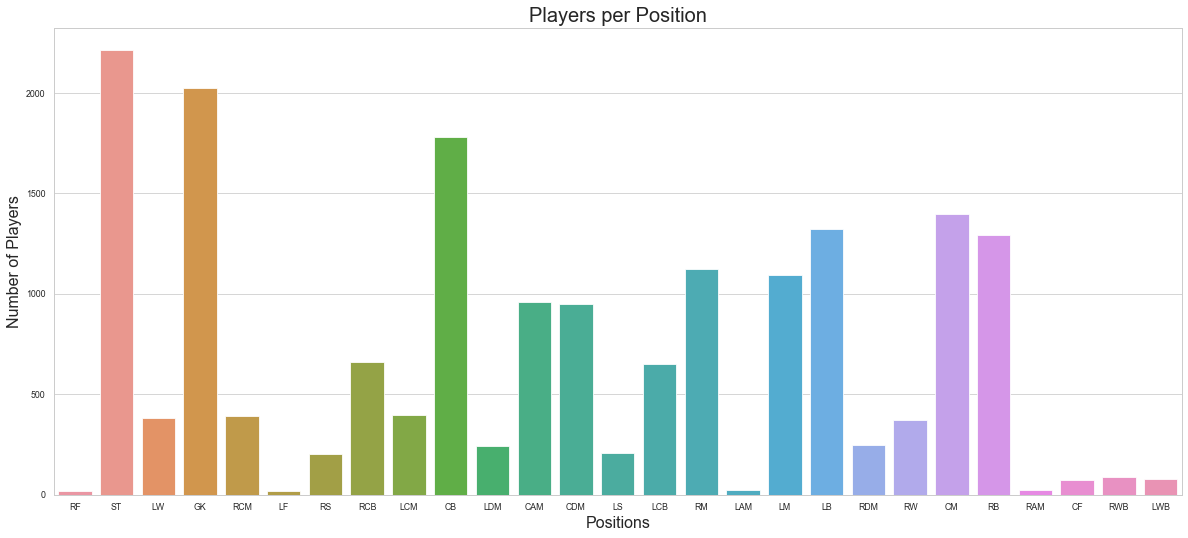

In [401]:
# Players per each position 

plt.figure(figsize = (18, 8))
_ = sns.countplot('Position', data = df)
_.set_xlabel(xlabel = 'Positions', fontsize = 16)
_.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
_.set_title(label =  'Players per Position', fontsize = 20)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

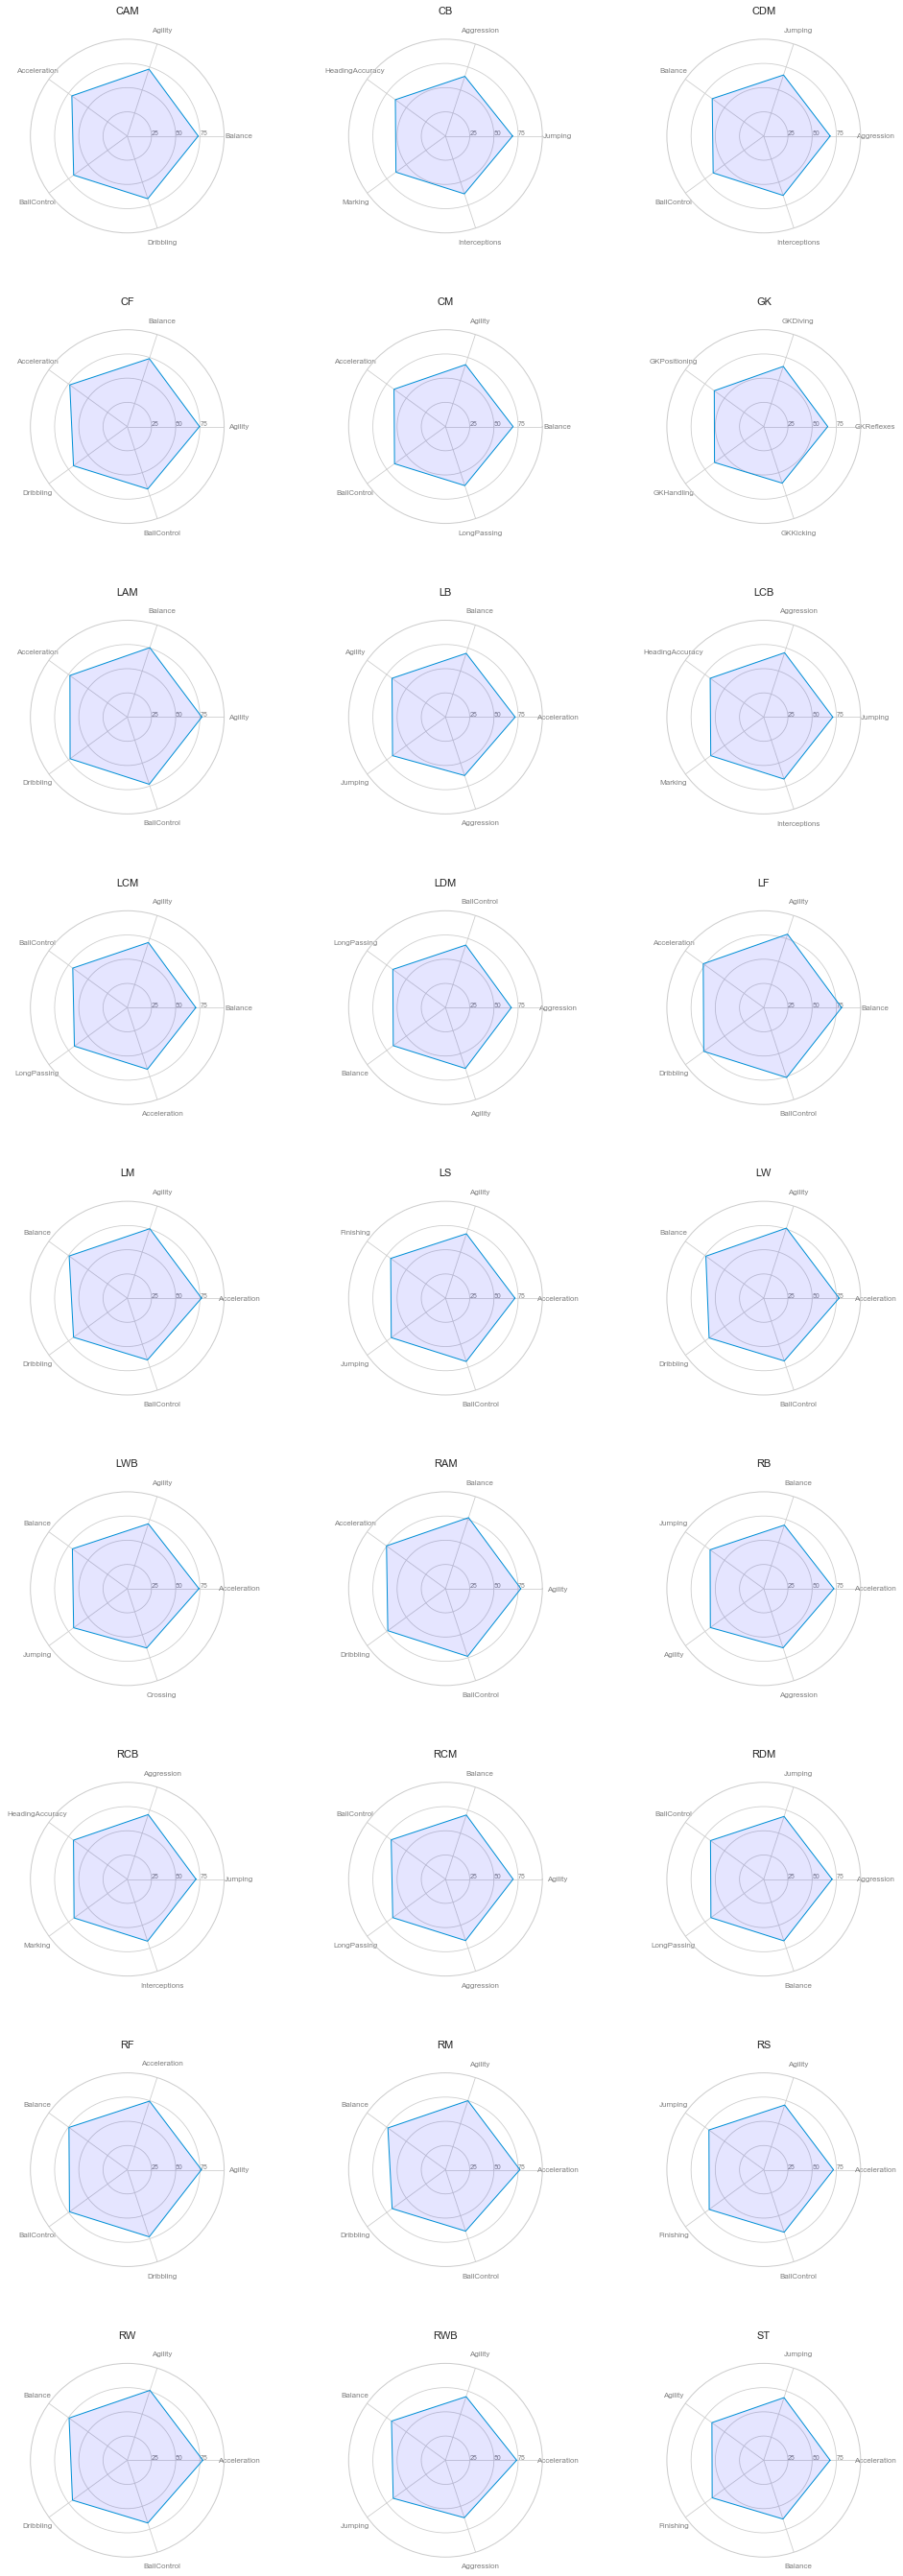

In [391]:
# Source : https://www.kaggle.com/dczerniawko/fifa19-analysis
# Start here < 

player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# Top three features per position
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * (22/7) for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 
    
    #  > End here

In [392]:
# We can see what attributes look like for each position.

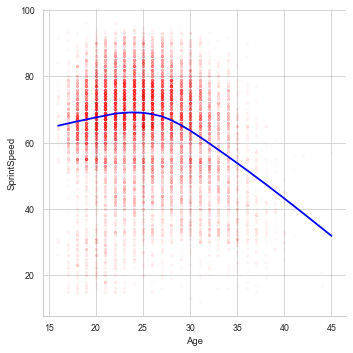

In [393]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.02, 's':6,'color':'red'}, 
           line_kws={'color':'blue'})

In [394]:
# Invetigate the relationship between "Value" and other numerical Attributes
df.loc[:, 'LS':'RB'].head()

LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  ...   LWB  \
0  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  ...  64+2   
1  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  ...  65+3   
2  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  ...  65+3   
3  61+2  61+2  61+2  63+2  61+2  61+2  61+2  63+2  61+2  61+2  ...  61+2   
4  82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  ...  77+3   

    LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  
0  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2  
1  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3  
3  62+2  62+2  62+2  61+2  61+2  63+2  63+2  63+2  61+2  
4  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3  

[5 rows x 26 columns]

In [395]:
df['LW'].dtypes

dtype('O')

In [396]:
'''Top 10 player of FIFA 19 based on rating'''

df[df['Overall'] > 90][['Name', 'Age', 'Club', 'Nationality']]

Name  Age                 Club Nationality
0           L. Messi   31         FC Barcelona   Argentina
1  Cristiano Ronaldo   33             Juventus    Portugal
2          Neymar Jr   26  Paris Saint-Germain      Brazil
3             De Gea   27    Manchester United       Spain
4       K. De Bruyne   27      Manchester City     Belgium
5          E. Hazard   27              Chelsea     Belgium
6          L. Modrić   32          Real Madrid     Croatia
7          L. Suárez   31         FC Barcelona     Uruguay
8       Sergio Ramos   32          Real Madrid       Spain

No handles with labels found to put in legend.


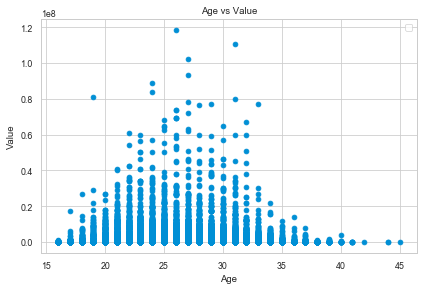

No handles with labels found to put in legend.


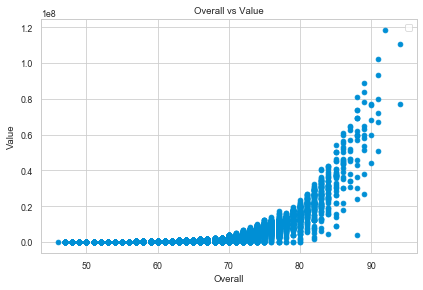

No handles with labels found to put in legend.


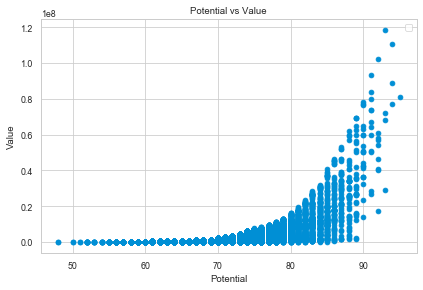

No handles with labels found to put in legend.


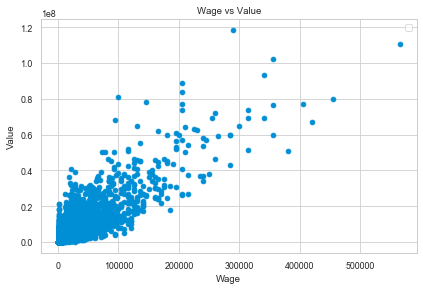

No handles with labels found to put in legend.


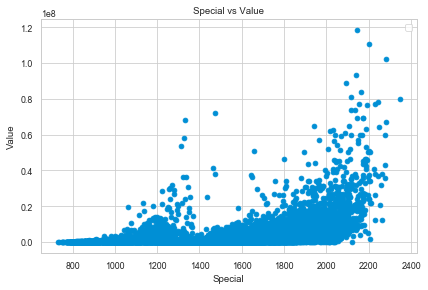

No handles with labels found to put in legend.


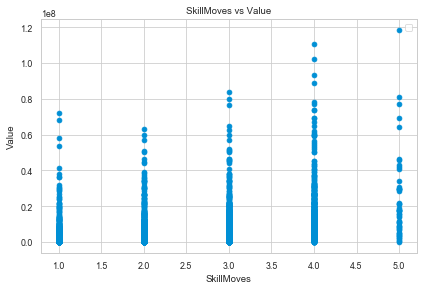

No handles with labels found to put in legend.


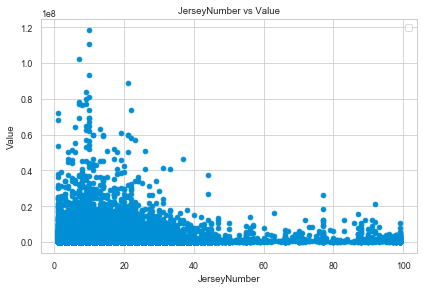

No handles with labels found to put in legend.


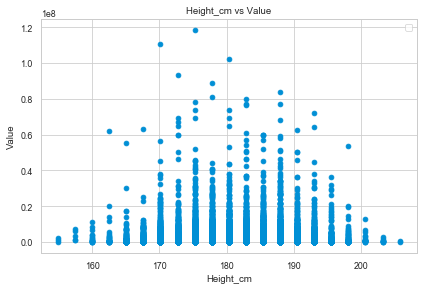

No handles with labels found to put in legend.


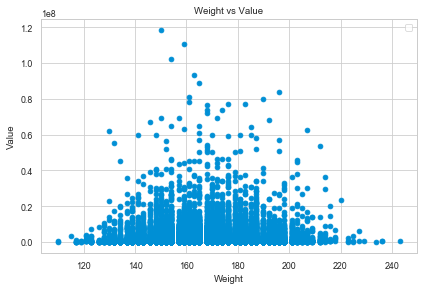

No handles with labels found to put in legend.


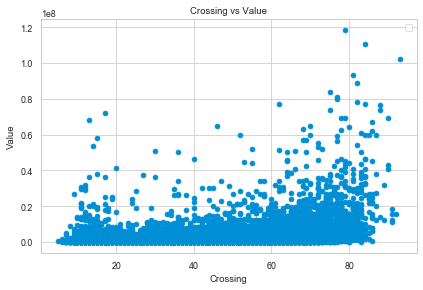

No handles with labels found to put in legend.


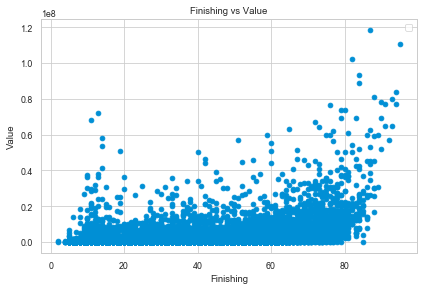

No handles with labels found to put in legend.


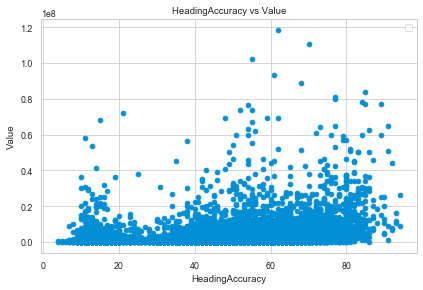

No handles with labels found to put in legend.


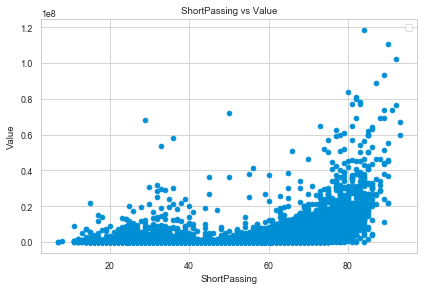

No handles with labels found to put in legend.


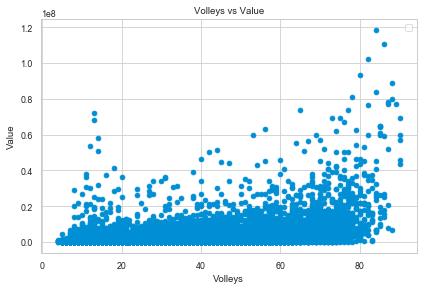

No handles with labels found to put in legend.


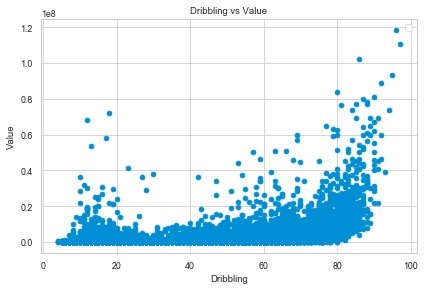

No handles with labels found to put in legend.


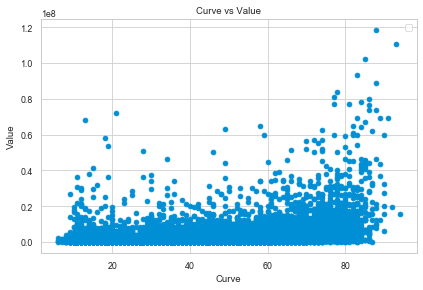

No handles with labels found to put in legend.


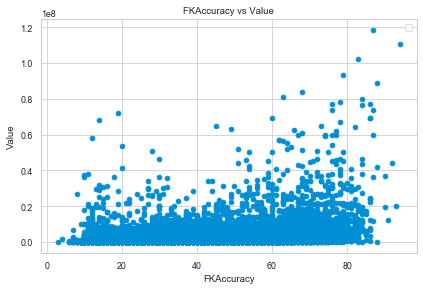

No handles with labels found to put in legend.


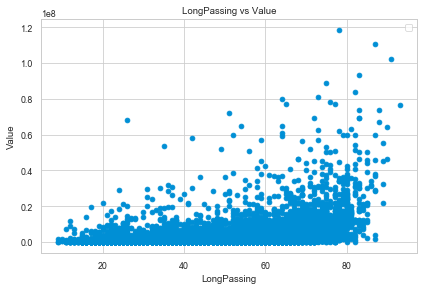

No handles with labels found to put in legend.


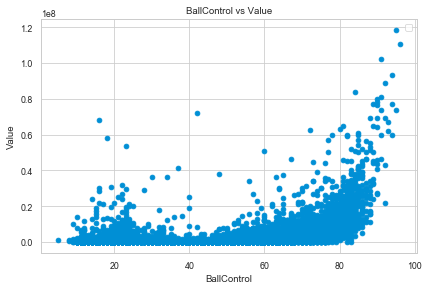

No handles with labels found to put in legend.


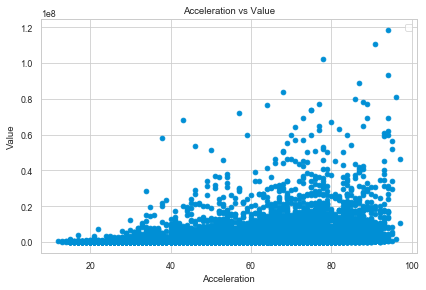

No handles with labels found to put in legend.


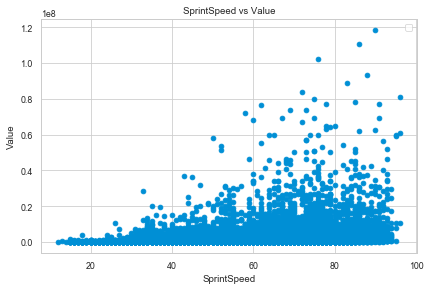

No handles with labels found to put in legend.


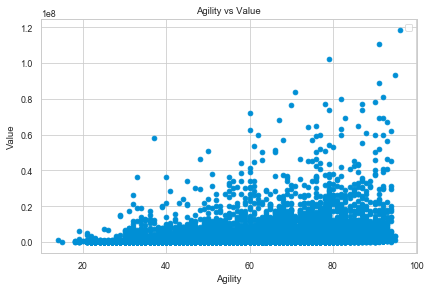

No handles with labels found to put in legend.


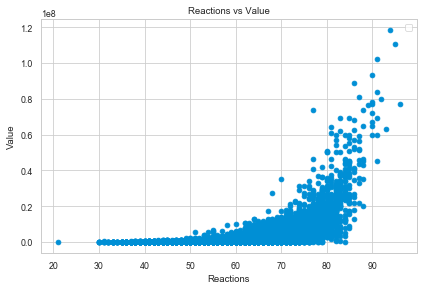

No handles with labels found to put in legend.


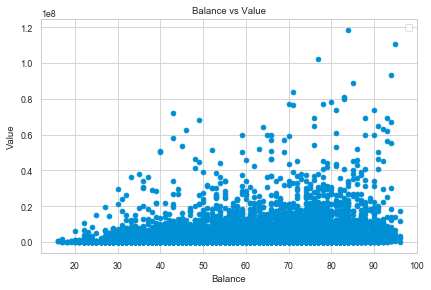

No handles with labels found to put in legend.


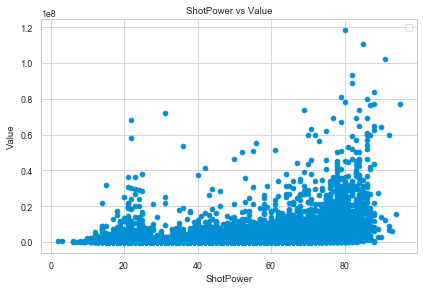

No handles with labels found to put in legend.


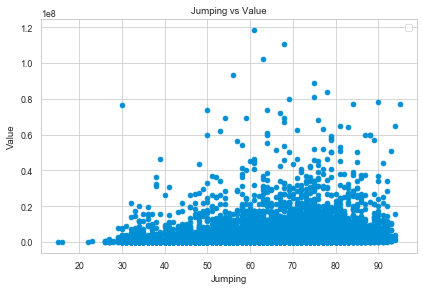

No handles with labels found to put in legend.


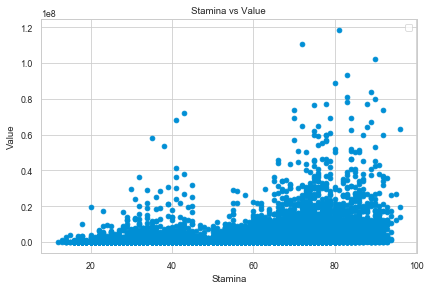

No handles with labels found to put in legend.


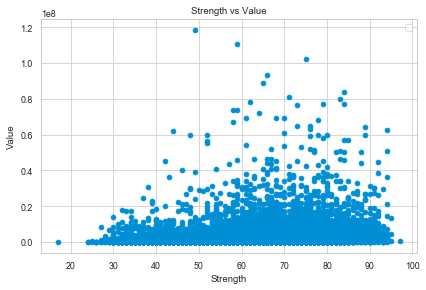

No handles with labels found to put in legend.


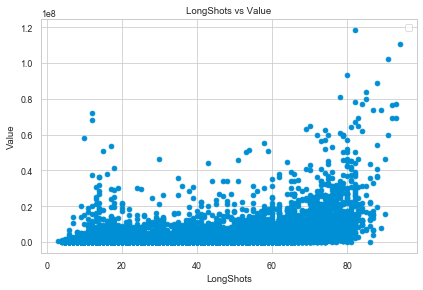

No handles with labels found to put in legend.


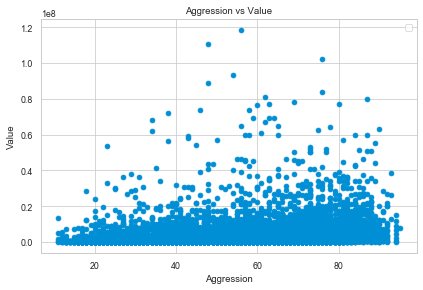

No handles with labels found to put in legend.


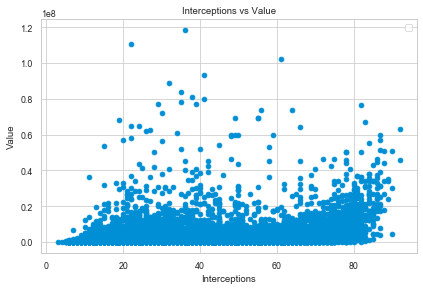

No handles with labels found to put in legend.


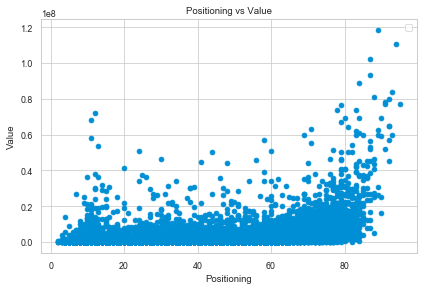

No handles with labels found to put in legend.


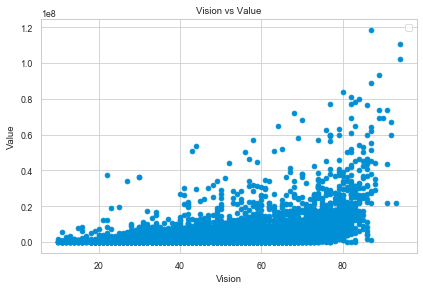

No handles with labels found to put in legend.


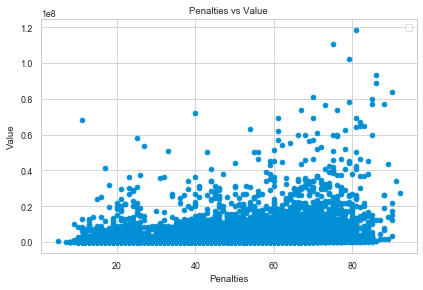

No handles with labels found to put in legend.


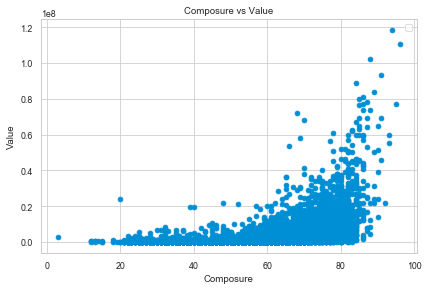

No handles with labels found to put in legend.


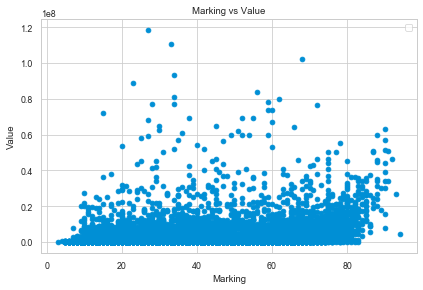

No handles with labels found to put in legend.


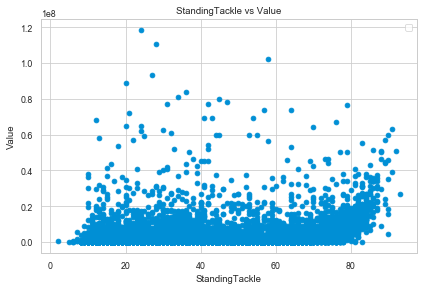

No handles with labels found to put in legend.


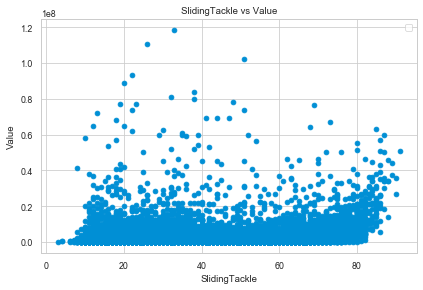

No handles with labels found to put in legend.


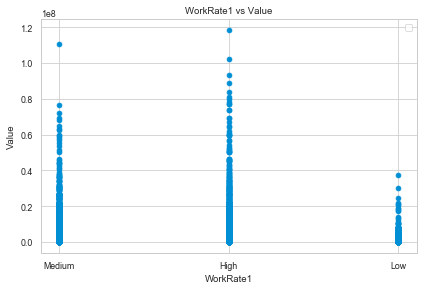

No handles with labels found to put in legend.


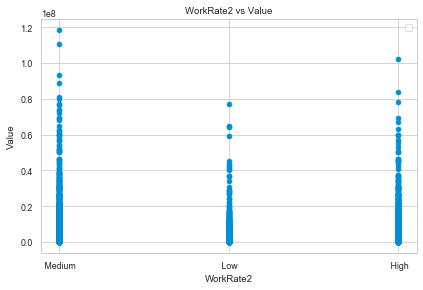

No handles with labels found to put in legend.


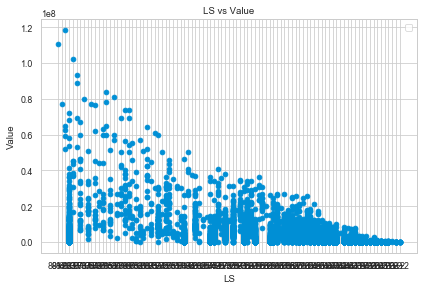

No handles with labels found to put in legend.


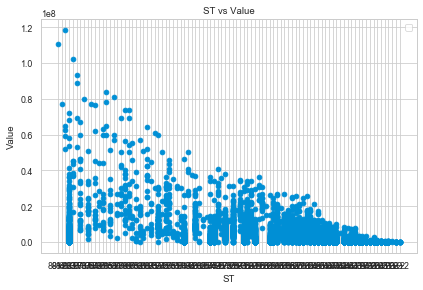

No handles with labels found to put in legend.


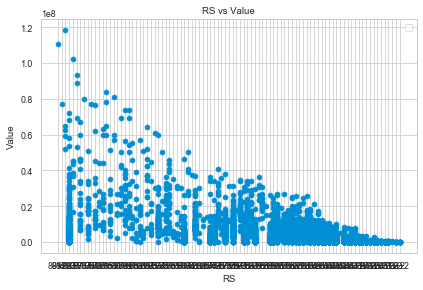

No handles with labels found to put in legend.


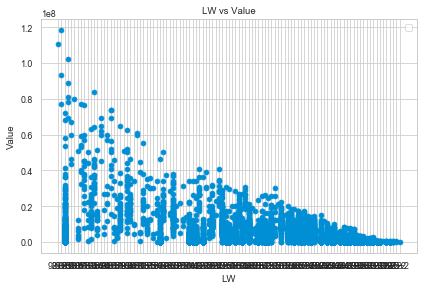

No handles with labels found to put in legend.


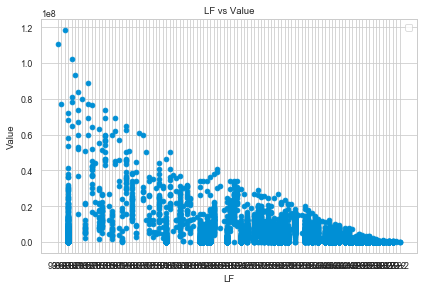

No handles with labels found to put in legend.


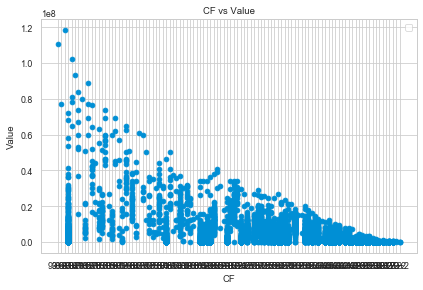

No handles with labels found to put in legend.


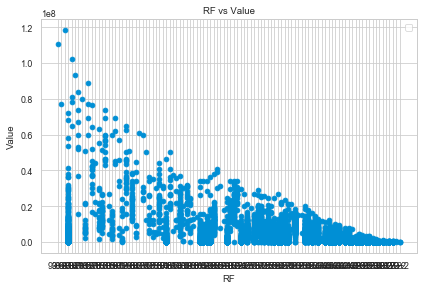

No handles with labels found to put in legend.


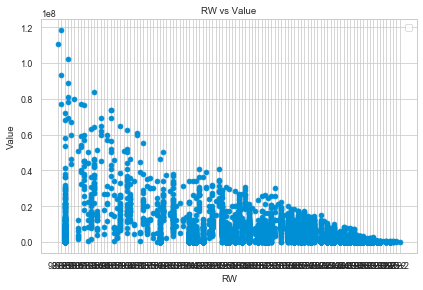

No handles with labels found to put in legend.


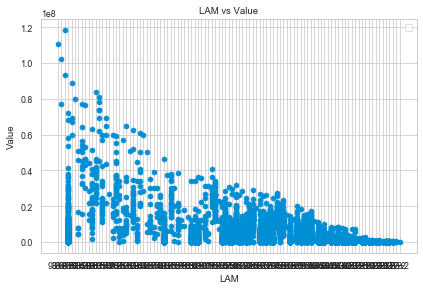

No handles with labels found to put in legend.


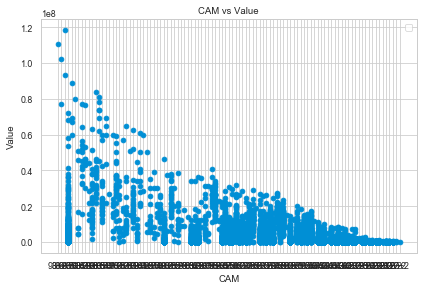

No handles with labels found to put in legend.


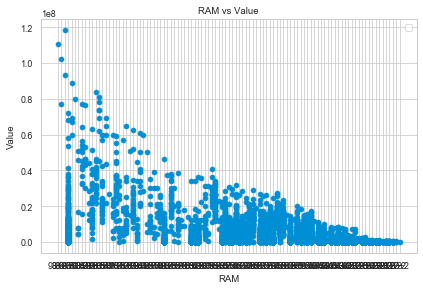

No handles with labels found to put in legend.


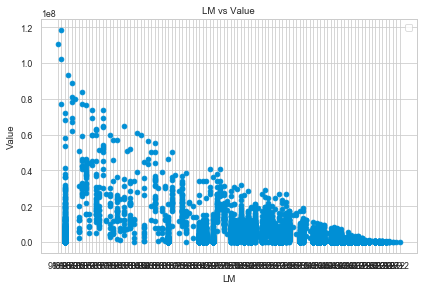

No handles with labels found to put in legend.


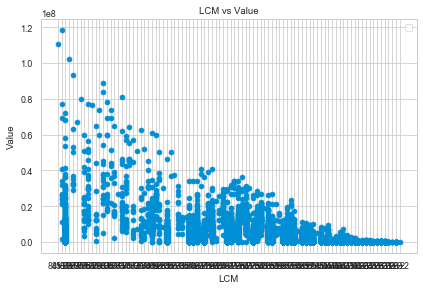

No handles with labels found to put in legend.


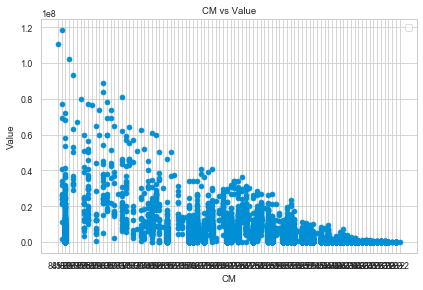

No handles with labels found to put in legend.


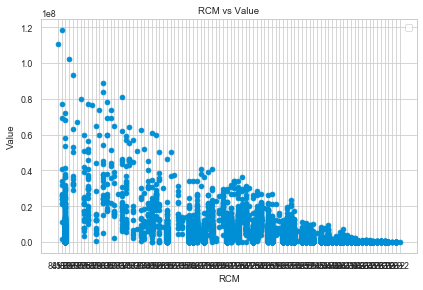

No handles with labels found to put in legend.


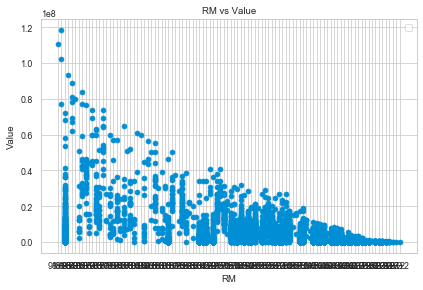

No handles with labels found to put in legend.


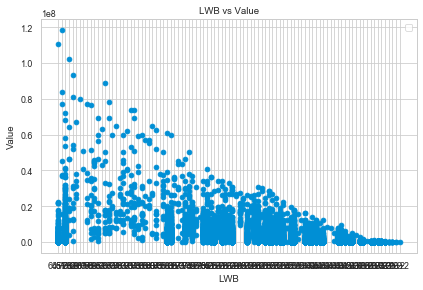

No handles with labels found to put in legend.


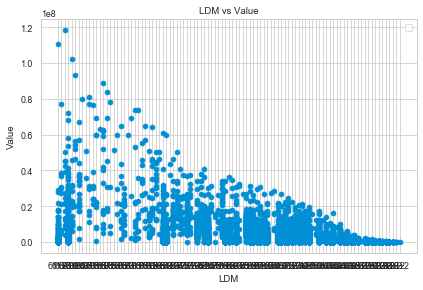

No handles with labels found to put in legend.


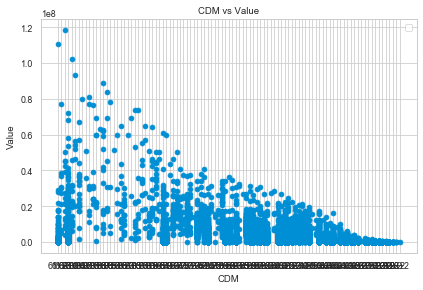

No handles with labels found to put in legend.


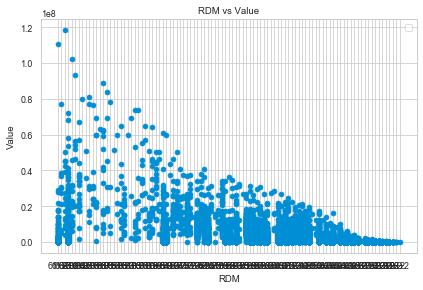

No handles with labels found to put in legend.


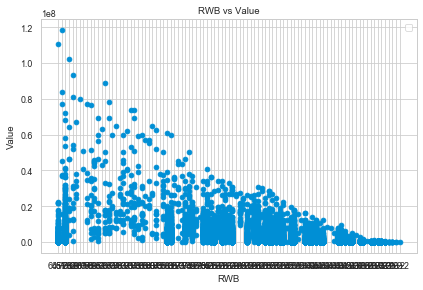

No handles with labels found to put in legend.


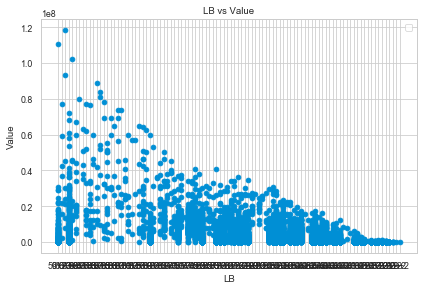

No handles with labels found to put in legend.


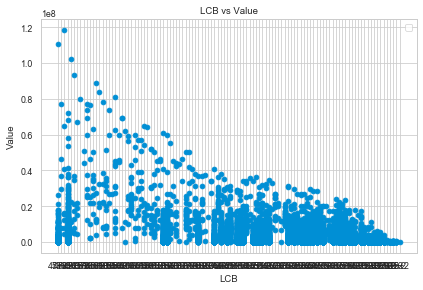

No handles with labels found to put in legend.


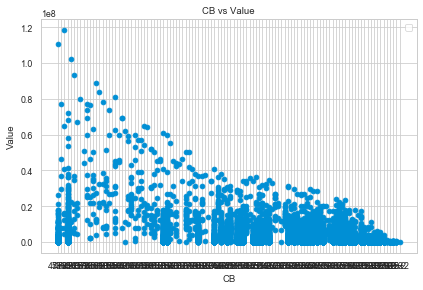

No handles with labels found to put in legend.


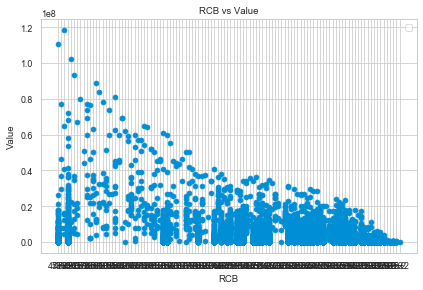

No handles with labels found to put in legend.


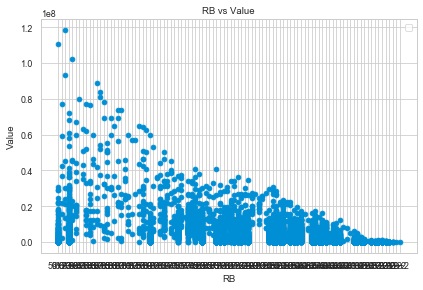

In [397]:
# Explore scatterplot for each Column against Value

x_columns = ['Age', 'Overall', 'Potential', 
       'Wage', 'Special', 'SkillMoves','JerseyNumber',
        'Height_cm', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 
        'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'WorkRate1',
       'WorkRate2', 'LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 
'LB', 'LCB', 'CB', 'RCB', 'RB']
y_col = 'Value'


for x_col in x_columns: 
    
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df[y_col], )
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title('{} vs {}'.format(x_col,y_col))
    
    plt.legend()
    plt.show()
    

Text(0.5, 1, 'Wage vs Value')

<Figure size 720x576 with 0 Axes>

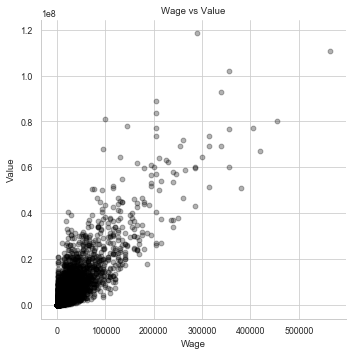

In [247]:
# Exploring certain variables in detail

# basic scatterplot
plt.figure(figsize = (10,8))
sns.lmplot( x="Wage", y="Value", data=df, fit_reg=False,
          scatter_kws={"color":"black","alpha":0.3})
plt.title('Wage vs Value')
# Wage and Value are closely(and positively) correlated as expected

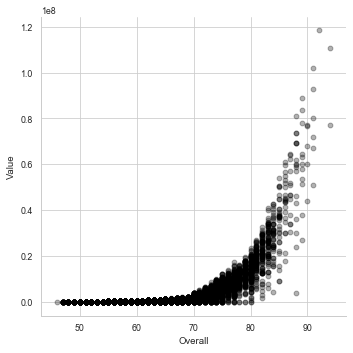

In [205]:
sns.lmplot( x="Overall", y="Value", data=df, fit_reg=False, 
          scatter_kws={"color":"black","alpha":0.3})

# Overall rating exponentially related to Value

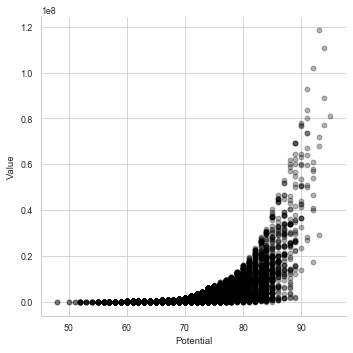

In [206]:
sns.lmplot( x="Potential", y="Value", data=df, fit_reg=False, 
          scatter_kws={"color":"black","alpha":0.3})

# Similar relationship as the "overal", perhaps overall rating and
# potential are closely correlated

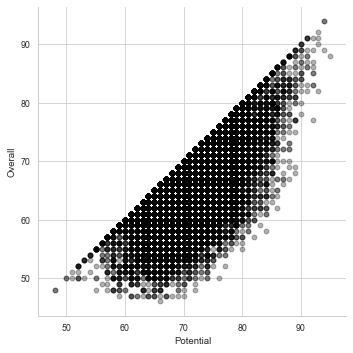

In [207]:
sns.lmplot( x="Potential", y="Overall", data=df, fit_reg=False, 
          scatter_kws={"color":"black","alpha":0.3})

# Yes, they are

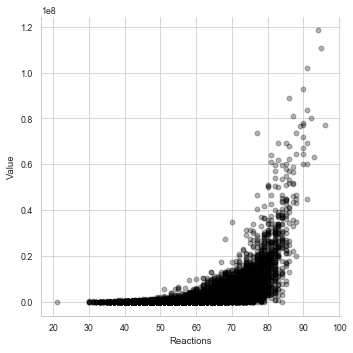

In [208]:
sns.lmplot( x="Reactions", y="Value", data=df, fit_reg=False, 
          scatter_kws={"color":"black","alpha":0.3})

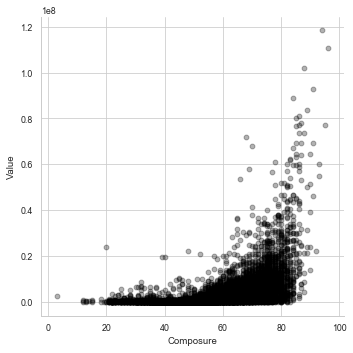

In [398]:
sns.lmplot(x = 'Composure', y = 'Value', data = df, fit_reg = False,
          scatter_kws = {'color': 'black', 'alpha' : 0.3})

In [213]:
# ranking players based on hteir overall score for each position 
data.iloc[data.groupby(df['Position'])['Overall'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Blues')

In [215]:
# best player based on potential score for each position 
data.iloc[data.groupby(df['Position'])['Potential'].idxmax()][['Position', 'Name',
                                                                 'Age', 'Club', 'Nationality']].style.background_gradient('Greens')

In [ ]:
'''Create New DataFrame without the positional columns: 
'LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 
'LB', 'LCB', 'CB', 'RCB', 'RB',  + Goalkeeper stats''' 
# The logic behind this is that certain positions have strength
# in certain attributes, thus, having those attributes -- i.e.
# acceleration-- for a given player provides the necessary info.
# In other words, player attributes dictate their position.

In [209]:
interesting_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'PreferredFoot', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'BodyType', 'Position', 'JerseyNumber',
       'Joined', 'ContractValidUntil','Height_cm', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'WorkRate1',
       'WorkRate2' ]

In [210]:
# New Dataframe without the positional columns 
data = pd.DataFrame(df, columns = interesting_columns)
data.head()
print('Dimension :', data.shape)

Dimension : (18207, 51)


In [322]:
# plt.figure(figsize = (50,40))
# sns.heatmap(data[['Age', 'Nationality', 'Overall', 'Potential', 'Value',
#        'Wage', 'Special', 'InternationalReputation',
#        'WeakFoot', 'SkillMoves', 'BodyType', 'Position',
#        'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
#        'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
#        'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
#        'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
#        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
#        'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'WorkRate1',
#        'WorkRate2']].corr(), annot= True, cmap = 'viridis')
# plt.title("Player Heatmap", fontsize = 30)
# plt.show()

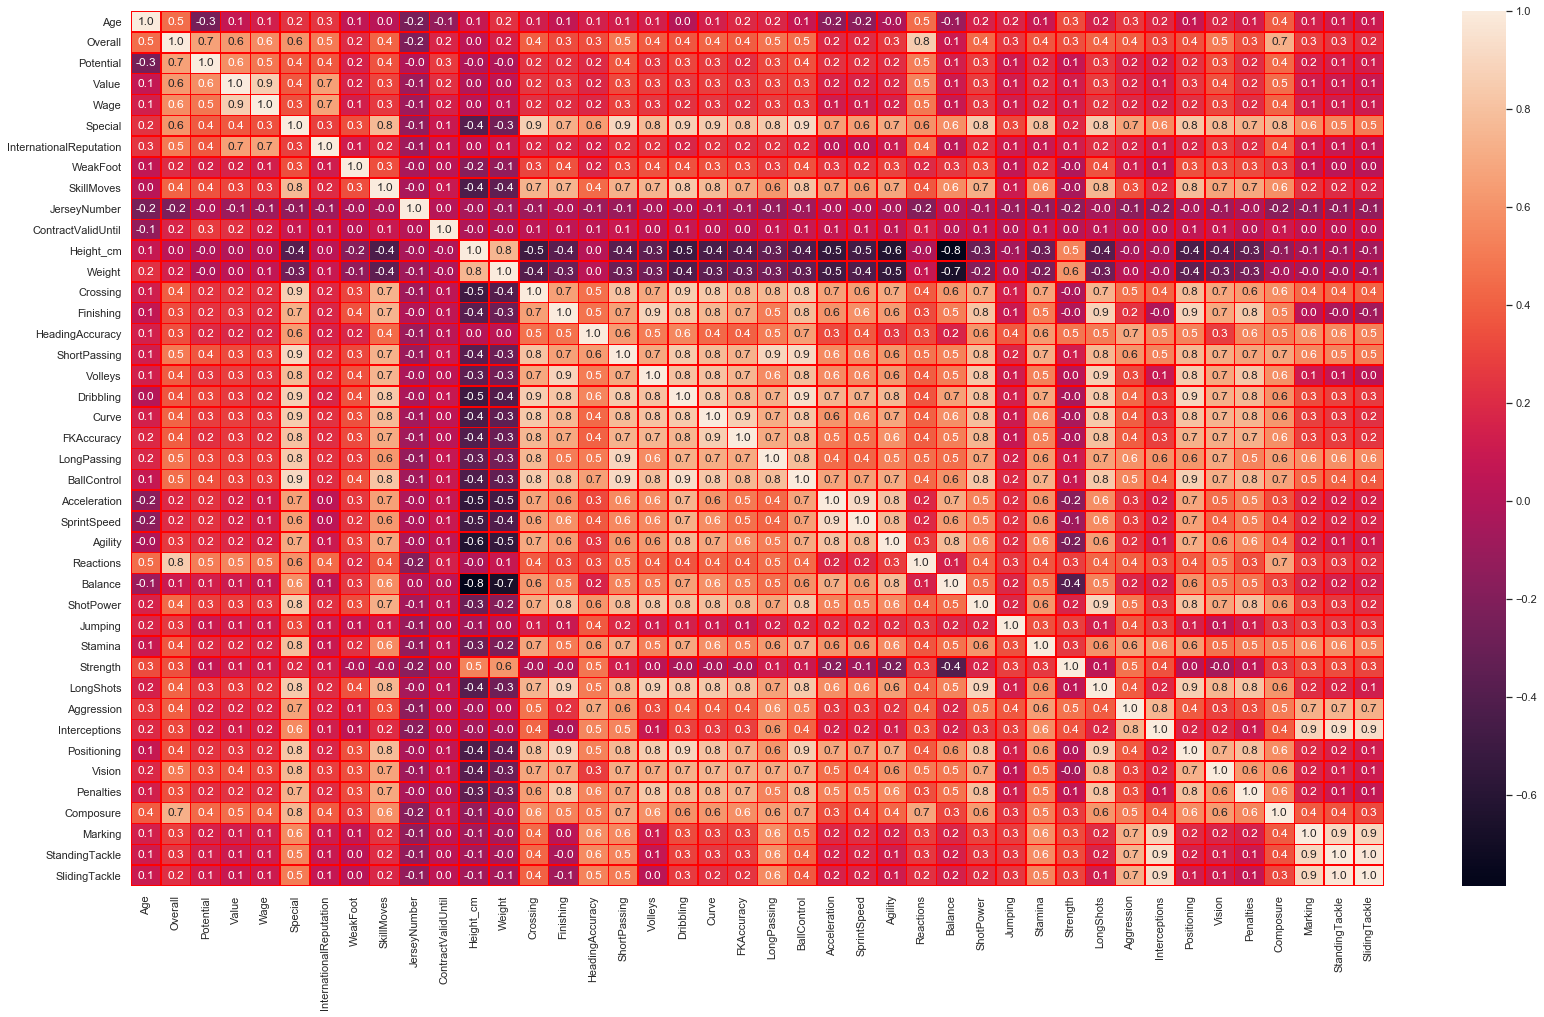

In [424]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()